In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# for i in range(df.shape[0]):
#         f=df['Fare'].iloc[i]
#         if f>10 and f<40:
#             print(f,df['Cabin'].iloc[i])


a=[i for i in df['Cabin'] if type(i)!=float]
print(len(df['Cabin']))
print(len(a))
# plt.hist()


891
204


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

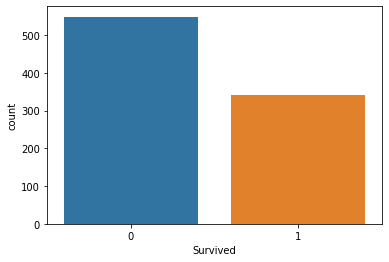

In [9]:
sns.countplot(x='Survived',data=df)

In [10]:
df_num=df[['Age','SibSp','Parch','Fare']]
df_cat=df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [11]:
print(df.Pclass.value_counts())
print(df.Parch.value_counts())
print(df.SibSp.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


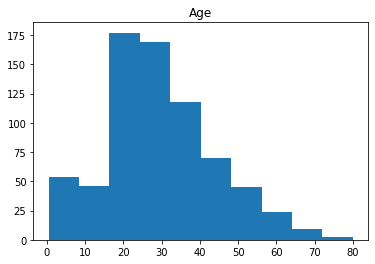

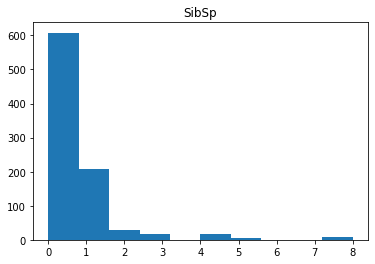

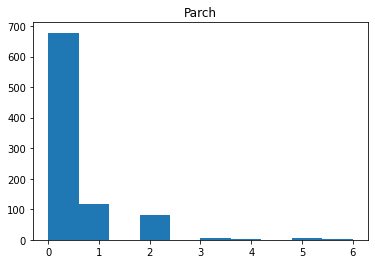

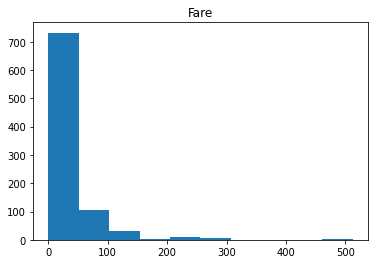

In [12]:
for i in df_num.columns:
        plt.hist(x=df_num[i])
        plt.title(i)
        plt.show()

In [13]:
print(df_num.corr())


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

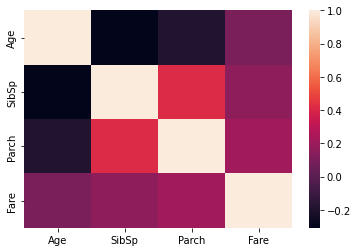

In [14]:
sns.heatmap(df_num.corr())

In [15]:
pd.pivot_table(df,index='Survived',values=['Age','Fare','Parch','SibSp'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


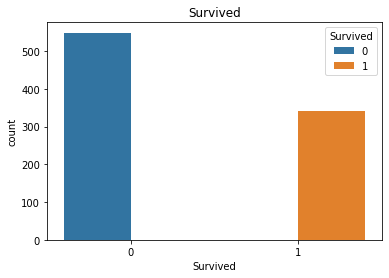

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


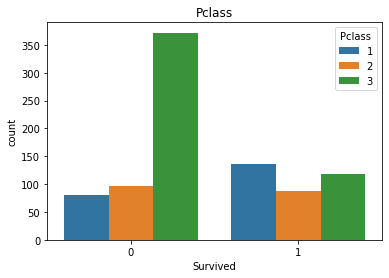

Sex       female  male
Survived              
0             81   468
1            233   109


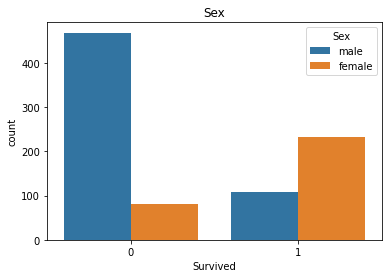

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


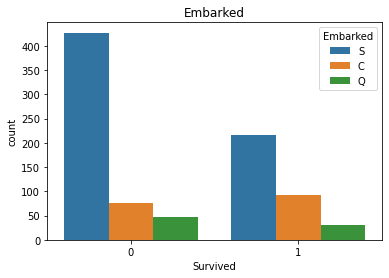

In [16]:

for i in df_cat.columns:
    if i!='Ticket' and i!='Cabin':
        if i!='Survived':
            print(pd.pivot_table(df,index='Survived',columns=i,values='Ticket',aggfunc='count'))
        sns.countplot(x='Survived',data=df_cat,hue=i)
        plt.title(i)
        plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

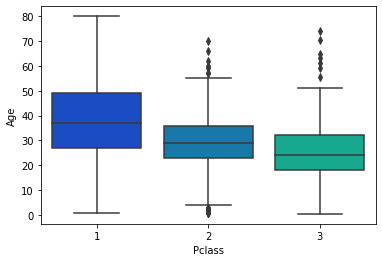

In [17]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [18]:
def imputeAge(cols):
    Pclass=cols[0]
    age=cols[1]
    if pd.isnull(age):
        if(Pclass==1):
            age=37
        elif(Pclass==2):
            age=29
        else:
            age=24        
    return age        

In [19]:
age=df[['Pclass','Age']].apply(imputeAge,axis=1)

In [20]:
df['Age']=age

<AxesSubplot:>

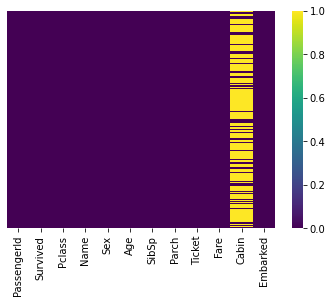

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [22]:
df.drop('Cabin',inplace=True,axis=1)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:

i=0
for a in df.Embarked.isnull():
                 i+=1
                 if a==True:
                      print(i)
# len(df)


62
830


In [25]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [26]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [27]:
embark.iloc[830]


Q    0
S    0
Name: 830, dtype: uint8

In [28]:
print(len(sex))

891


In [29]:
Pclass=pd.get_dummies(df['Pclass'],drop_first=True)

In [30]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [33]:
df.drop(['Pclass'],axis=1,inplace=True)

In [34]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [35]:
Pclass.columns=['2','3']

In [36]:
train1=pd.concat([df,sex,embark,Pclass],axis=1)


In [37]:
train1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [38]:
train1.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2',
       '3'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,y_train=train1.drop("Survived",axis=1),train1['Survived']

In [41]:
from sklearn.linear_model import LogisticRegression


In [42]:
model=LogisticRegression()

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaling=MinMaxScaler()

In [45]:
X_train=scaling.fit_transform(X_train)
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
model.coef_

array([[-2.15203201, -1.43772397, -0.40618053,  0.58384556, -2.53838705,
        -0.12717144, -0.48248051, -0.77843683, -1.99952794]])

In [47]:
test=pd.read_csv('test.csv')

In [48]:
X_test=pd.DataFrame(test)

In [49]:
X_test['Age']=X_test[['Pclass','Age']].apply(imputeAge,axis=1)

In [50]:
X_test.drop('Cabin',inplace=True,axis=1)

In [51]:
embarkTest=pd.get_dummies(X_test['Embarked'],drop_first=True)
sexTest=pd.get_dummies(X_test['Sex'],drop_first=True)

In [52]:
PclassTest=pd.get_dummies(X_test['Pclass'],drop_first=True)

In [53]:
PclassTest.columns=['2','3']


In [54]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [55]:
len(test)

418

In [56]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [57]:
X_test.drop(['PassengerId','Name','Ticket','Sex','Embarked','Pclass'],axis=1,inplace=True)


In [58]:
X_test=pd.concat([X_test,sexTest,embarkTest,PclassTest],axis=1)

In [59]:
X_test=scaling.fit_transform(X_test)

In [60]:
X_test

array([[0.4527232 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.61756561, 0.125     , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.8153765 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.50547277, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.31425557, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.31425557, 0.125     , 0.11111111, ..., 0.        , 0.        ,
        1.        ]])

<AxesSubplot:>

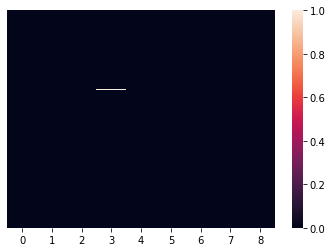

In [62]:
sns.heatmap(pd.DataFrame(X_test).isnull(),yticklabels=False)

In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
model.coef_

array([[-2.15203201, -1.43772397, -0.40618053,  0.58384556, -2.53838705,
        -0.12717144, -0.48248051, -0.77843683, -1.99952794]])

In [65]:
print(X_train[0:4])

[[0.27117366 0.125      0.         0.01415106 1.         0.
  1.         0.         1.        ]
 [0.4722292  0.125      0.         0.13913574 0.         0.
  0.         0.         0.        ]
 [0.32143755 0.         0.         0.01546857 0.         0.
  1.         0.         1.        ]
 [0.43453129 0.125      0.         0.1036443  0.         0.
  1.         0.         0.        ]]


In [66]:
print(X_test[0:4])

[[0.4527232  0.         0.         0.01528158 1.         1.
  0.         0.         1.        ]
 [0.61756561 0.125      0.         0.01366309 0.         0.
  1.         0.         1.        ]
 [0.8153765  0.         0.         0.01890874 1.         1.
  0.         1.         0.        ]
 [0.35381775 0.         0.         0.01690807 1.         0.
  1.         0.         1.        ]]


In [67]:
i=0
for a in X_test[:,3]:
    i+=1
    if pd.isna(a):
         print(a,i)

nan 153


In [77]:
X_test[0:][152]


array([0.79559541, 0.        , 0.        ,        nan, 1.        ,
       0.        , 1.        , 0.        , 1.        ])

In [86]:
sum=0
count=0
for a in range(len(test)):
    if(X_test[a][8]==1 and  a!=152):
              sum+=test['Fare'].iloc[a]
              count+=1
avg_Fare3=sum/count        

In [87]:
avg_Fare3

12.459677880184334

In [88]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [89]:
X_test[152][3]=12

In [90]:
pred=model.predict(X_test)

In [91]:
y_test=pd.read_csv('gender_submission.csv')

In [92]:
len(y_test)

418

In [93]:
len(pred)

418

In [94]:
from sklearn.metrics import accuracy_score


In [95]:
y_test=y_test['Survived']

In [96]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [114]:
accurac=accuracy_score(y_test,pred)
print(y_test,pred)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64 [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [113]:
accurac

0.9521531100478469

In [99]:
import pickle

In [100]:
with open("titanicLogisticRegressionModel.pickle",'wb') as f:
            pickle.dump(model,f)

In [101]:
submit=pd.DataFrame(pred)
# pd.DataFrame.to_csv('submit.csv',)
submit

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [102]:
submit=pd.concat([test.PassengerId,submit],axis=1)

In [103]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
submit.columns=['PassengerId','Survived']

In [105]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [106]:
submit.to_csv('Submissions1.csv',index=False)

In [434]:
submit.reset_index(drop=True,inplace=True)